In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
f = pd.read_csv("lfw20.csv", header = None)
f.head()

,0,1,2,3,4,5,6,7,8,9,...,5646,5647,5648,5649,5650,5651,5652,5653,5654,5655
0,0,45.0,46.000,44.0000,43.000,44.333,46.667,50.667,57.000,62.000,...,165.67,179.670,181.330,178.670,173.330,171.330,158.670,113.000,70.000,57.333
1,0,10.0,9.000,5.6667,5.000,7.000,10.000,16.000,18.000,20.667,...,121.33,113.000,94.000,63.000,31.000,20.667,21.333,20.667,20.333,23.000
2,0,15.0,18.667,16.6670,20.000,27.333,34.000,39.000,50.667,69.667,...,170.67,200.000,224.330,228.670,231.000,228.000,230.000,227.000,224.330,225.670
3,0,33.0,31.667,32.0000,31.333,32.333,38.333,41.333,42.000,52.667,...,50.00,50.333,50.333,50.333,50.667,50.667,50.667,50.333,50.000,50.000
4,0,33.0,33.333,29.6670,26.667,28.000,33.667,43.000,54.333,63.667,...,147.33,167.000,194.670,214.670,223.330,228.330,226.000,220.670,193.670,126.330


In [3]:
data = f.to_numpy()[:, 1:]
index = f.to_numpy()[:, 0]
print(index)
data = data / 255
print(data.shape, data[87, 65])
pd.DataFrame(data).head()

[ 0.  0.  0. ... 61. 61. 61.]
(1240, 5655) 0.18823529411764706


,0,1,2,3,4,5,6,7,8,9,...,5645,5646,5647,5648,5649,5650,5651,5652,5653,5654
0,0.176471,0.180392,0.172549,0.168627,0.173855,0.183008,0.198694,0.223529,0.243137,0.250980,...,0.649686,0.704588,0.711098,0.700667,0.679725,0.671882,0.622235,0.443137,0.274510,0.224835
1,0.039216,0.035294,0.022222,0.019608,0.027451,0.039216,0.062745,0.070588,0.081047,0.116341,...,0.475804,0.443137,0.368627,0.247059,0.121569,0.081047,0.083659,0.081047,0.079737,0.090196
2,0.058824,0.073204,0.065361,0.078431,0.107188,0.133333,0.152941,0.198694,0.273204,0.345098,...,0.669294,0.784314,0.879725,0.896745,0.905882,0.894118,0.901961,0.890196,0.879725,0.884980
3,0.129412,0.124184,0.125490,0.122875,0.126796,0.150325,0.162090,0.164706,0.206537,0.258824,...,0.196078,0.197384,0.197384,0.197384,0.198694,0.198694,0.198694,0.197384,0.196078,0.196078
4,0.129412,0.130718,0.116341,0.104576,0.109804,0.132027,0.168627,0.213071,0.249675,0.290196,...,0.577765,0.654902,0.763412,0.841843,0.875804,0.895412,0.886275,0.865373,0.759490,0.495412


In [4]:
zscored_data = (data - np.mean(data, axis = 0))/(np.std(data, axis = 0, ddof = 1))
print(pd.DataFrame(zscored_data).head())
w, v = np.linalg.eigh(np.cov(np.transpose(zscored_data)))#'w' represents eigen values and 'v' represents eigen vectors
X = v[:, w.argsort()[::-1][:1]]

       0         1         2         3         4         5         6     \
0 -0.564229 -0.587435 -0.673766 -0.764694 -0.837078 -0.908420 -0.963986   
1 -1.224072 -1.280519 -1.384199 -1.464950 -1.521913 -1.581714 -1.607425   
2 -1.129809 -1.099436 -1.180330 -1.188533 -1.148925 -1.141016 -1.180533   
3 -0.790461 -0.855920 -0.896162 -0.979691 -1.057205 -1.061452 -1.137231   
4 -0.790461 -0.824713 -0.939400 -1.065675 -1.136690 -1.147131 -1.106290   

       7         8         9     ...      5645      5646      5647      5648  \
0 -0.959331 -0.992991 -1.085575  ...  0.696900  0.865959  0.873325  0.833173   
1 -1.683875 -1.773001 -1.748690  ...  0.027852 -0.113354 -0.382544 -0.797779   
2 -1.076986 -0.848304 -0.622033  ...  0.772345  1.164585  1.491697  1.538175   
3 -1.238002 -1.169117 -1.046946  ... -1.048448 -1.033866 -1.010508 -0.976384   
4 -1.008878 -0.961532 -0.892432  ...  0.420167  0.679850  1.065164  1.340775   

       5649      5650      5651      5652      5653      5654  
0  0

In [5]:
max_val = w.argmax()
w[max_val], X.shape#Test

(1520.2576790558653, (5655, 1))

(-0.5, 64.5, 86.5, -0.5)

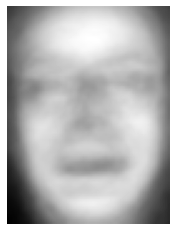

In [6]:
%matplotlib inline
im = X.reshape(87, 65)
plt.imshow(im, cmap = 'gray')
plt.axis('off')

In [7]:
retry = zscored_data[-1, :] @ X#I'm using the very last picture
retry

array([-49.49103817])

(-0.5, 64.5, 86.5, -0.5)

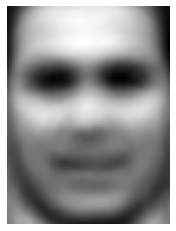

In [8]:
im2 = (retry * X)[:, 0] * np.std(data, axis = 0, ddof = 1) + np.mean(data, axis = 0)
plt.imshow(im2.reshape(87,65), cmap = 'gray')
plt.axis('off')

Just take a moment to appreciate these nightmares....

In [9]:
#To find number of principal components
D, tmp = 0, 0
for i in sorted(w, reverse = True):
    D += 1
    if (tmp+i) / np.sum(w) < 0.95:
        tmp += i
    else:
        break
print(f'We need at least {D} principal components')

We need at least 180 principal components


In [10]:
def PCA(d, D):
    '''PCA for D = <user input>'''
    w, v  =np.linalg.eigh(np.cov(np.transpose(d)))
    return v[:, w.argsort()[-D:].tolist()[::-1]]

In [11]:
try2 = PCA(zscored_data, D)

In [12]:
try2.shape, X.shape

((5655, 180), (5655, 1))

(-0.5, 64.5, 86.5, -0.5)

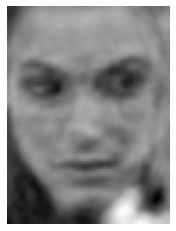

In [13]:
im3 = zscored_data @ try2 @ np.transpose(try2) * np.std(data, axis = 0, ddof = 1) + np.mean(data, axis = 0)
plt.imshow(im3[-1, :].reshape(87, 65), cmap = 'gray')
plt.axis('off')

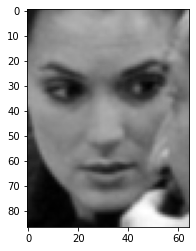

In [14]:
#Just for comparison
plt.imshow(f.to_numpy()[-1, 1:].reshape(87, 65), cmap = 'gray')

Looks pretty good!!